## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the Car price dataset like last week. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

In [1]:
import pandas as pd

In [2]:
df_car_price = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [3]:
df_car_price

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
df_car_price.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

We'll work with the `MSRP` variable, and we'll transform it to a classification task. 

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`
* `MSRP`

In [5]:
# Selecting the specified columns
selected_columns = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']
filtered_df = df_car_price[selected_columns]

### Data preparation

* Keep only the columns above
* Lowercase the column names and replace spaces with underscores
* Fill the missing values with 0 
* Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable `above_average`

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 2: Lowercase column names and replace spaces with underscores
filtered_df.columns = filtered_df.columns.str.lower().str.replace(' ', '_')

# Step 3: Fill missing values with 0
filtered_df.fillna(0, inplace=True)

# Step 4: Make the price binary (1 if above the average, 0 otherwise)
average_price = filtered_df['msrp'].mean()
filtered_df['above_average'] = (filtered_df['msrp'] > average_price).astype(int)
filtered_df.drop('msrp', axis=1, inplace=True)
# Step 5: Split the data into train/validation/test sets
X = filtered_df.drop('above_average', axis=1)
y = filtered_df['above_average']

# Split into train/validation/test with 60%/20%/20% distribution
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

# Print the shapes of the resulting datasets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (7148, 9) (7148,)
Validation set shape: (2383, 9) (2383,)
Test set shape: (2383, 9) (2383,)


/home/swanaung/miniconda3/envs/sa_env/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/home/swanaung/miniconda3/envs/sa_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
/home/swanaung/miniconda3/envs/sa_env/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `above_average` variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `engine_hp`
- `engine_cylinders`
- `highway_mpg`
- `city_mpg`

In [9]:
from sklearn.metrics import roc_auc_score

# Assuming X_train, y_train are the training features and target variable
# Let's use only the specified numerical columns
numerical_columns = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

# Dictionary to store AUC scores for each numerical variable
auc_scores = {}

# Calculate AUC for each numerical variable
for col in numerical_columns:
    auc = roc_auc_score(y_train, X_train[col])
    
    # If AUC is less than 0.5, invert the variable
    if auc < 0.5:
        auc = roc_auc_score(y_train, -X_train[col])
    
    auc_scores[col] = auc

# Print the AUC scores for each numerical variable
for col, auc in auc_scores.items():
    print(f'AUC for {col}: {auc}')

# Find the numerical variable with the highest AUC
highest_auc_variable = max(auc_scores, key=auc_scores.get)
print(f'\nThe numerical variable with the highest AUC is: {highest_auc_variable}')


AUC for engine_hp: 0.9159001518508375
AUC for engine_cylinders: 0.768274900593613
AUC for highway_mpg: 0.6333685399678282
AUC for city_mpg: 0.67232674562278

The numerical variable with the highest AUC is: engine_hp


### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.678
- 0.779
- 0.878
- 0.979

In [10]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

# Assuming X_val, y_val are the validation features and target variable
# Assuming X_train is the training features with one-hot encoding

# Step 1: Perform one-hot encoding using DictVectorizer
dict_vectorizer = DictVectorizer(sparse=False)
X_train_encoded = dict_vectorizer.fit_transform(X_train.to_dict(orient='records'))
X_val_encoded = dict_vectorizer.transform(X_val.to_dict(orient='records'))

# Step 2: Train a logistic regression model
logreg = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
logreg.fit(X_train_encoded, y_train)

# Step 3: Calculate the AUC on the validation dataset
y_val_pred_proba = logreg.predict_proba(X_val_encoded)[:, 1]  # Probability of being class 1
auc_val = roc_auc_score(y_val, y_val_pred_proba)

# Print the AUC on the validation dataset (rounded to 3 digits)
print(f"AUC on the validation dataset: {auc_val:.3f}")

AUC on the validation dataset: 0.980


### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.28
* 0.48
* 0.68
* 0.88

Threshold at which precision and recall curves intersect: 0.99


/home/swanaung/miniconda3/envs/sa_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


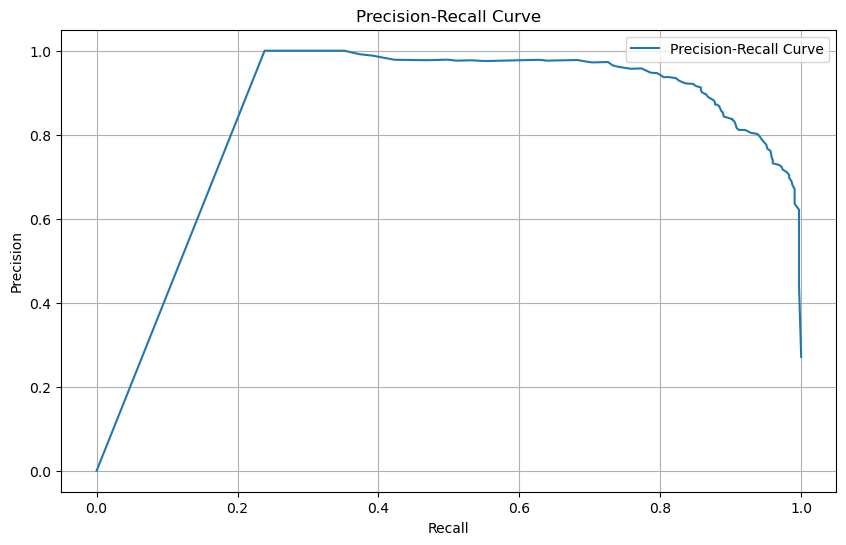

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Generate thresholds from 0.0 to 1.0 with step 0.01
thresholds = np.arange(0.0, 1.01, 0.01)

# Initialize lists to store precision and recall values
precision_values = []
recall_values = []

# Calculate precision and recall for each threshold
for threshold in thresholds:
    y_val_pred = (y_val_pred_proba > threshold).astype(int)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    precision_values.append(precision)
    recall_values.append(recall)

# Plot precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall_values, precision_values, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)

# Find the threshold at which the curves intersect
intersecting_threshold = thresholds[np.argmax(np.abs(np.array(precision_values) - np.array(recall_values)))]

# Print the threshold at which precision and recall curves intersect
print(f"Threshold at which precision and recall curves intersect: {intersecting_threshold:.2f}")

# Display the plot
plt.show()


### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.12
- 0.32
- 0.52
- 0.72

In [12]:
# Calculate F1 score for each threshold
f1_scores = [2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0 for precision, recall in zip(precision_values, recall_values)]

# Find the threshold at which F1 score is maximal
max_f1_threshold = thresholds[np.argmax(f1_scores)]
max_f1_score = max(f1_scores)

# Print the threshold at which F1 score is maximal
print(f"Threshold at which F1 score is maximal: {max_f1_threshold:.2f}")
print(f"Maximal F1 score: {max_f1_score:.3f}")


Threshold at which F1 score is maximal: 0.54
Maximal F1 score: 0.884


### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

- 0.003
- 0.030
- 0.090
- 0.140

In [17]:
import numpy as np
from sklearn.model_selection import KFold

# Assuming df_car_price contains the DataFrame with the necessary data
# Also assuming 'above_average' is the target variable

# Initialize KFold with 5 splits, shuffling, and a random state
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize a list to store AUC scores across different folds
auc_scores = []

# Assuming X and y are the features and target variable
X = filtered_df.drop('above_average', axis=1)
y = filtered_df['above_average']

# Iterate over different folds
for train_index, val_index in kf.split(X):
    # Split the data into train and validation sets
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # Perform one-hot encoding using DictVectorizer
    X_train_encoded_fold = dict_vectorizer.transform(X_train_fold.to_dict(orient='records'))
    X_val_encoded_fold = dict_vectorizer.transform(X_val_fold.to_dict(orient='records'))
    
    # Train the model on train data
    logreg_fold = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    logreg_fold.fit(X_train_encoded_fold, y_train_fold)
    
    # Predict probabilities for the validation set
    y_val_pred_proba_fold = logreg_fold.predict_proba(X_val_encoded_fold)[:, 1]
    
    # Calculate AUC for the validation set
    auc_fold = roc_auc_score(y_val_fold, y_val_pred_proba_fold)
    auc_scores.append(auc_fold)

# Calculate the standard deviation of AUC scores across different folds
std_dev_auc = np.std(auc_scores)

# Print the standard deviation of the AUC scores
print(f"Standard deviation of AUC scores across different folds: {std_dev_auc:.3f}")


Standard deviation of AUC scores across different folds: 0.003


### Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.01, 0.1, 0.5, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.01
- 0.1
- 0.5
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.





## Submit the results

- Submit your results here: https://forms.gle/E7Fa3WuBw3HkPQYg6
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is October 9 (Monday), 23:00 CET. After that the form will be closed.